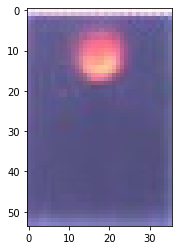

In [36]:
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2

image_dir = '../labeled-data/segmented-images'
filenames = []
labels = []
with open('../labeled-data/labels.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in csvreader:
        filenames.append(row[0])
        labels.append(row[1])
        
filepaths = [os.path.join(image_dir,filename)for filename in filenames]

img_idx = 0

img = cv2.imread(filepaths[img_idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()


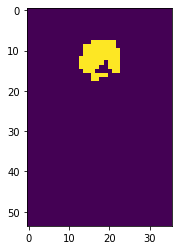

In [37]:
img = cv2.bitwise_not(img)

hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV);
lower_red = np.array([90-10,70,50])
upper_red = np.array([90+10,255,255])
mask = cv2.inRange(hsv, lower_red, upper_red)

#findContours()

plt.imshow(mask)
plt.show()
